In [2]:
import zipfile, os

zip_path = "/content/sms+spam+collection (1).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

os.listdir('/content/dataset')

['SMSSpamCollection', 'readme']

✅ Dataset loaded successfully!
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
✅ Model training completed!
🎯 Model Accuracy: 96.68%

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



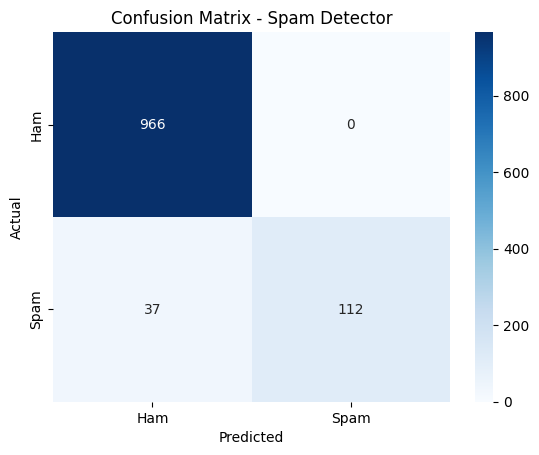

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://88bfcd274d23f112af.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
# ==============================================
# 📘 Step 1: Import Required Libraries
# ==============================================
import pandas as pd
import zipfile
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr

# ==============================================
# 📦 Step 2: Extract and Load Dataset
# ==============================================
# Replace with your uploaded ZIP file path
#zip_path = '/content/sms+spam+collection (1).zip'

zip_path = "/content/sms+spam+collection (1).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check extracted files
os.listdir('/content/dataset')

# Usually the dataset file name is "SMSSpamCollection"
file_path = '/content/dataset/SMSSpamCollection'

# Load data
df = pd.read_csv(file_path, sep='\t', names=['label', 'message'])
print("✅ Dataset loaded successfully!")
print(df.head())

# ==============================================
# 🧹 Step 3: Clean the Text Data
# ==============================================
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned'] = df['message'].apply(clean_text)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# ==============================================
# 📊 Step 4: Split Data for Training & Testing
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned'], df['label_num'], test_size=0.2, random_state=42)

# ==============================================
# ✍️ Step 5: Convert Text into Vectors
# ==============================================
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ==============================================
# 🤖 Step 6: Train the Model
# ==============================================
model = LogisticRegression()
model.fit(X_train_vec, y_train)
print("✅ Model training completed!")

# ==============================================
# 🧩 Step 7: Evaluate the Model
# ==============================================
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {acc*100:.2f}%\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Spam Detector")
plt.show()

# ==============================================
# 🚀 Step 8: Build Interactive Gradio App
# ==============================================
def predict_spam(message):
    msg_clean = clean_text(message)
    msg_vec = vectorizer.transform([msg_clean])
    prediction = model.predict(msg_vec)[0]
    probability = model.predict_proba(msg_vec)[0][1]

    if prediction == 1:
        return f"🚫 SPAM Message (Confidence: {probability*100:.2f}%)"
    else:
        return f"✅ Not Spam (Confidence: {(1-probability)*100:.2f}%)"

demo = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(label="Enter an Email or SMS Message:"),
    outputs="text",
    title="📧 Spam Message Detector",
    description="A real-world ML model that detects spam messages using Logistic Regression and TF-IDF features."
)

demo.launch(share=True)